In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X = np.load('x_digits.npy')
y = np.load('y_digits.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
X.shape, y.shape # num_samples, height (frequency bins), width (time steps)

((35631, 129, 71), (35631,))

### Fully Connected NN

In [80]:
X_train_fc = X_train.reshape(X_train.shape[0], -1)
X_val_fc = X_val.reshape(X_val.shape[0], -1)
X_test_fc = X_test.reshape(X_test.shape[0], -1) 

X_train_fc.shape, X_val_fc.shape, X_test_fc.shape

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (X_train_fc.shape[1],)))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 4)
optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
history = model.fit(X_train_fc, y_train, epochs = 40, validation_data=(X_val_fc, y_val), callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2825 - loss: 3.4857 - val_accuracy: 0.4178 - val_loss: 1.6592 - learning_rate: 0.0010
Epoch 2/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4370 - loss: 1.6052 - val_accuracy: 0.4808 - val_loss: 1.3928 - learning_rate: 0.0010
Epoch 3/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5459 - loss: 1.2914 - val_accuracy: 0.6201 - val_loss: 1.0857 - learning_rate: 0.0010
Epoch 4/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6272 - loss: 1.0767 - val_accuracy: 0.6332 - val_loss: 1.0997 - learning_rate: 0.0010
Epoch 5/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6625 - loss: 0.9780 - val_accuracy: 0.6597 - val_loss: 1.0201 - learning_rate: 0.0010
Epoch 6/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6921 - loss: 0.9002 - val_accuracy: 0.6790 - val_loss: 0.9574 - learning_rate: 0.0010
Epoch 7/40
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7092 - loss: 0.8410 - 

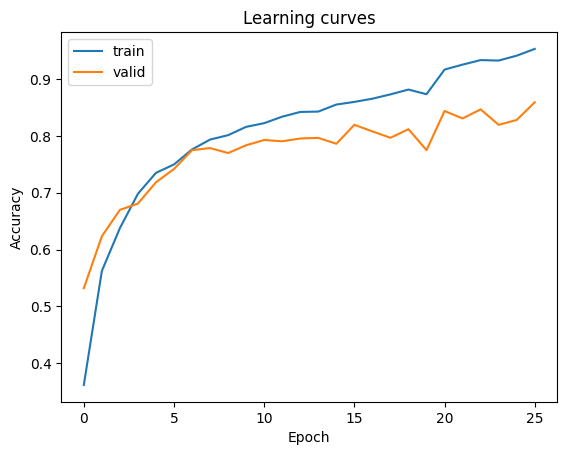

In [65]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [66]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train_fc, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_fc, y_test)))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9249 - loss: 0.2240
Loss + accuracy on train data: [0.22404921054840088, 0.9248782992362976]
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8410 - loss: 0.5866  
Loss + accuracy on test data: [0.5865510106086731, 0.8410270810127258]


### Convolutional

In [72]:
X_train_cnn = X_train[..., np.newaxis] # adds channel dimension
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train_cnn[0].shape))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)
optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
history = model.fit(X_train_cnn, y_train, epochs = 30, validation_data=(X_val_cnn, y_val), callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6084 - loss: 1.6821 - val_accuracy: 0.8285 - val_loss: 0.5314 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8548 - loss: 0.4419 - val_accuracy: 0.8946 - val_loss: 0.3230 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9169 - loss: 0.2502 - val_accuracy: 0.8965 - val_loss: 0.3260 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9436 - loss: 0.1676 - val_accuracy: 0.9155 - val_loss: 0.2973 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9642 - loss: 0.1087 - val_accuracy: 0.9165 - val_loss: 0.3121 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9718 - loss: 0.0920 - val_accuracy: 0.9095 - val_loss: 0.3292 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9856 - l

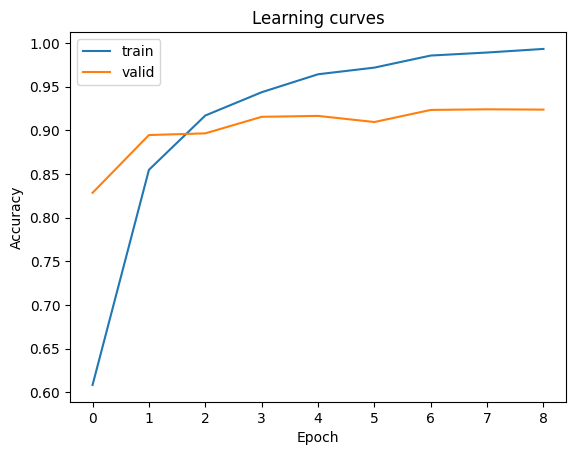

In [73]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [74]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train_cnn, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_cnn, y_test)))

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0536
Loss + accuracy on train data: [0.053581226617097855, 0.9846072793006897]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9082 - loss: 0.3063
Loss + accuracy on test data: [0.30632588267326355, 0.9082362651824951]


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


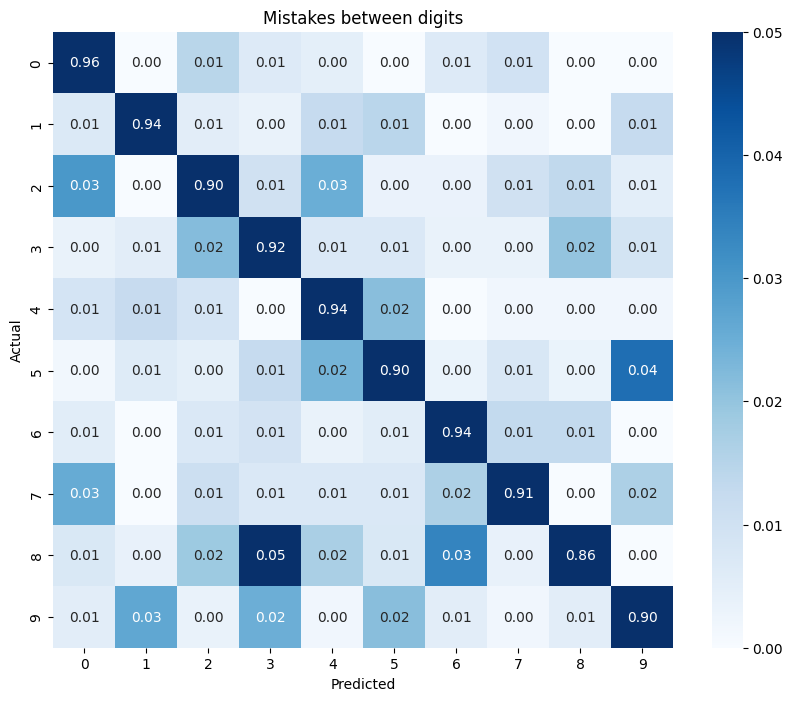

In [ ]:
y_pred_probs = model.predict(X_val_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_val, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            vmin=0, vmax=0.05)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mistakes between digits")
plt.show()